In [1]:
import ROOT
import glob
import time
import ipywidgets as widgets


Welcome to JupyROOT 6.22/06


In [2]:
data_year = 'data17'


chain = ROOT.TChain('outTree')
files = glob.glob(f'/data/hnl/v3_ntuples/data/user.rnewhous.{data_year}_ntuple_v1_tree.root/*.root')
c = ROOT.TCanvas()

from ipywidgets import IntProgress
from IPython.display import display
import time

max_count = len(files)

prog = IntProgress(min=0, max=max_count) # instantiate the bar
display(prog) # display the bar

h = ROOT.TH1D('crossing', 'crossing', 100,0,100)

count = 0
for f in files:
    chain.Add(f)

    count += 1    
    prog.value += 1
    
    if count > max_count: break


IntProgress(value=0, max=201)

In [3]:
h_correctedActualMu = ROOT.TH1D('h_correctedActualMu', 'h_correctedActualMu', 100,0,100)
chain.Draw('correctedActualMu>>h_correctedActualMu')

h_correctedAndScaledActualMu = ROOT.TH1D('h_correctedAndScaledActualMu', 'h_correctedAndScaledActualMu', 100,0,100)
chain.Draw('correctedAndScaledActualMu>>h_correctedAndScaledActualMu')

h_correctedAverageMu = ROOT.TH1D('h_correctedAverageMu', 'h_correctedAverageMu', 100,0,100)
chain.Draw('correctedAverageMu>>h_correctedAverageMu')

h_correctedAndScaledAverageMu = ROOT.TH1D('h_correctedAndScaledAverageMu', 'h_correctedAndScaledAverageMu', 100,0,100)
chain.Draw('correctedAndScaledAverageMu>>h_correctedAndScaledAverageMu')

h_actualInteractionsPerCrossing = ROOT.TH1D('h_actualInteractionsPerCrossing', 'h_actualInteractionsPerCrossing', 100,0,100)
chain.Draw('actualInteractionsPerCrossing>>h_actualInteractionsPerCrossing')

h_averageInteractionsPerCrossing = ROOT.TH1D('h_averageInteractionsPerCrossing', 'h_averageInteractionsPerCrossing', 100,0,100)
chain.Draw('averageInteractionsPerCrossing>>h_averageInteractionsPerCrossing')

h_NPV = ROOT.TH1D('h_NPV', 'h_NPV', 100,0,100)
chain.Draw('NPV>>h_NPV')


outfile = ROOT.TFile(f'/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/8_weight_test/{data_year}_crossings.root', 'RECREATE')
h_correctedActualMu.Write()
h_correctedAndScaledActualMu.Write()
h_correctedAverageMu.Write()
h_correctedAndScaledAverageMu.Write()
h_averageInteractionsPerCrossing.Write()
h_actualInteractionsPerCrossing.Write()
h_NPV.Write()
outfile.Close()

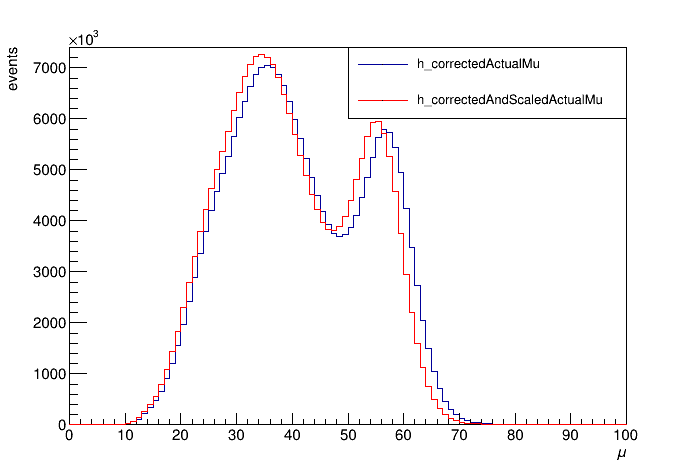

In [4]:
c = ROOT.TCanvas()


h_correctedActualMu.Draw()
h_correctedAndScaledActualMu.Draw("same")
h_correctedAndScaledActualMu.SetLineColor(ROOT.kRed)

h_correctedActualMu.SetTitle(" ;#\mu;events")
h_correctedActualMu.SetStats(0)
h_correctedAndScaledActualMu.SetStats(0)

leg = ROOT.TLegend(.5,.75,.9,.9)
leg.AddEntry(h_correctedActualMu, "h_correctedActualMu")
leg.AddEntry(h_correctedAndScaledActualMu, "h_correctedAndScaledActualMu")
leg.Draw()

c.Draw()

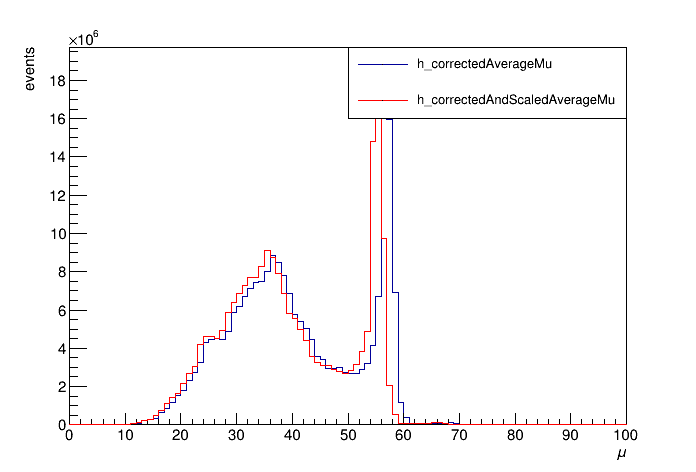

In [5]:
c = ROOT.TCanvas()


h_correctedAverageMu.Draw()
h_correctedAndScaledAverageMu.Draw("same")
h_correctedAndScaledAverageMu.SetLineColor(ROOT.kRed)

h_correctedAverageMu.SetTitle(" ;#\mu;events")
h_correctedAverageMu.SetStats(0)
h_correctedAndScaledAverageMu.SetStats(0)

leg = ROOT.TLegend(.5,.75,.9,.9)
leg.AddEntry(h_correctedAverageMu, "h_correctedAverageMu")
leg.AddEntry(h_correctedAndScaledAverageMu, "h_correctedAndScaledAverageMu")
leg.Draw()

c.Draw()